In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from math import pi

%matplotlib inline

In [362]:
df = pd.read_csv('./2019-2020 Big 5 Euro PCA Stats.csv')
pd.set_option('display.max_columns', None)

In [363]:
# Remove non-numerical data
all_columns = list(df.columns)
unwanted_columns = {'Rk','Player', 'Nation','Pos', 'Squad', 'Comp', 'Age','Born','90s'}
index_columns = [ele for ele in all_columns if ele not in unwanted_columns]

In [364]:
df1 = df.apply(pd.to_numeric, errors='coerce')

In [365]:
dfP90 = df1.loc[:,index_columns].div(df1['90s'], axis=0)

In [366]:
dfP90.fillna(0, inplace=True)

In [367]:
# P90 Dataframe
master_df = pd.concat([df[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s']], dfP90], axis = 1)

In [368]:
master_df['90s'] = master_df['90s'].apply(pd.to_numeric, errors='coerce')

In [369]:
master_df['Age'] = master_df['Age'].apply(pd.to_numeric, errors='coerce')

In [370]:
# Filter for players who have played at least 1000 minutes & remove Goalkeepers
mask0 = (master_df['90s'] > 11.11) & ((master_df.Pos == 'FW') | (master_df.Pos == 'FW,MF')
                                    | (master_df.Pos == 'MF,FW'))
master_df = master_df.loc[mask0]

In [371]:
mask=(master_df['Comp']=='eng Premier League') | (master_df['Comp']=='it Serie A') & (master_df['Player']=='Lorenzo Insigne')
master_df = master_df[mask]
master_df

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,SoT,G/Sh,xG,Pass 1/3,Ast,CrsPA,KP,Long Att,Long Cmp,Long Cmp%,Medium Att,Medium Cmp,Medium Cmp%,PPA,passPrgDist,passProg,Short Att,Short Cmp,Short Cmp%,TotDist,xA,BP Other,Crs,Ground,Head,High,Left,Live,Low,Pass Pressed,Right,Sw,TB,TI,GCADrib,GCAFld,GCAPassLive,GCASh,OG,SCADrib,SCAFld,SCAPassLive,SCASh,Blk Pass,Blk Sh,Blk ShSv,Blocks,Clr,Drib Past,Drib Tlk,Err,Int,Press,Press Att 3rd,Press Def 3rd,Press Mid 3rd,Succ,Tkl Att 3rd,Tkl Def 3rd,Tkl Mid 3rd,Tkl Tkl,Tkl TklW,Tkl%,Tkl+Int,#Pl,Carries,Dispos,Drib Att,Drib Succ,Megs,Miscon,PrgDist,Rec,Targ,Tch Att 3rd,Tch Att Pen,Tch Def 3rd,Tch Def Pen,Tch Live,Tch Mid 3rd,Fld,Fls,Aerial Lost,Recov,Aerial Won
7,Tammy Abraham,eng ENG,FW,Chelsea,eng Premier League,21.0,1997,24.6,0.609756,3.577236,1.422764,0.006911,0.589431,0.650407,0.121951,0.000000,0.731707,2.154472,1.585366,2.991870,12.439024,9.065041,2.963415,0.203252,33.048780,1.300813,2.195122,1.056911,1.955285,171.178862,0.105691,0.691057,0.406504,10.528455,0.731707,2.926829,1.260163,14.674797,3.333333,6.056911,12.439024,0.203252,0.000000,0.000000,0.121951,0.040650,0.162602,0.081301,0.000000,0.243902,0.081301,1.341463,0.243902,0.731707,0.203252,0.0,0.934959,1.056911,0.487805,0.162602,0.0,0.203252,17.439024,9.796748,0.772358,6.869919,5.284553,0.203252,0.162602,0.203252,0.569106,0.406504,1.016260,0.772358,0.894309,17.357724,1.910569,1.463415,0.853659,0.000000,2.886179,47.113821,20.162602,43.739837,14.308943,6.707317,2.398374,1.260163,28.008130,14.430894,0.975610,0.691057,4.512195,3.861789,2.723577
10,Che Adams,eng ENG,FW,Southampton,eng Premier League,23.0,1996,12.3,0.325203,3.008130,0.731707,0.008943,0.341463,0.975610,0.162602,0.000000,0.894309,3.495935,1.951220,4.536585,15.934959,12.195122,6.219512,0.243902,51.382114,1.707317,2.113821,0.813008,3.130081,238.373984,0.105691,0.406504,1.138211,13.008130,0.894309,3.089431,1.463415,20.894309,5.447154,5.934959,17.154472,0.650407,0.243902,0.000000,0.081301,0.162602,0.162602,0.000000,0.000000,0.243902,0.325203,1.219512,0.162602,0.731707,0.081301,0.0,0.813008,0.813008,0.406504,0.000000,0.0,0.162602,18.780488,10.162602,0.731707,7.886179,4.715447,0.162602,0.162602,0.325203,0.650407,0.487805,0.000000,0.813008,1.219512,25.040650,2.357724,2.195122,1.219512,0.081301,3.577236,68.373984,25.609756,53.414634,19.105691,5.528455,2.845528,0.813008,35.203252,16.504065,1.300813,1.382114,6.991870,5.934959,2.357724
27,Sergio Agüero,ar ARG,FW,Manchester City,eng Premier League,31.0,1988,16.1,0.993789,4.534161,1.552795,0.011801,0.857143,0.745342,0.186335,0.000000,0.993789,1.428571,1.118012,4.863354,19.006211,15.465839,5.055901,1.242236,48.509317,2.049689,2.360248,1.055901,2.776398,232.049689,0.149068,0.559006,0.621118,16.956522,0.683230,1.428571,2.546584,21.677019,4.409938,5.590062,18.819876,0.062112,0.310559,0.062112,0.062112,0.062112,0.248447,0.124224,0.000000,0.559006,0.310559,1.739130,0.559006,0.807453,0.124224,0.0,0.931677,0.186335,0.310559,0.062112,0.0,0.186335,13.788820,8.385093,0.807453,4.596273,3.478261,0.186335,0.000000,0.248447,0.434783,0.310559,1.037267,0.621118,1.739130,26.583851,2.546584,2.795031,1.677019,0.124224,1.490683,86.708075,27.950311,48.447205,23.975155,9.565217,1.304348,0.124224,34.223602,12.857143,0.559006,0.559006,0.869565,3.788820,0.124224
65,Dele Alli,eng ENG,"MF,FW",Tottenham,eng Premier League,23.0,1996,20.5,0.390244,1.902439,0.878049,0.008780,0.336585,2.000000,0.195122,0.000000,1.073171,7.902439,5.365854,3.312195,28.487805,24.195122,4.141463,1.170732,116.292683,3.268293,2.878049,0.731707,1.239024,501.902439,0.097561,0.390244,0.341463,28.634146,1.463415,3.853659,1.609756,36.439024,6.780488,9.512195,34.243902,0.390244,0.292683,0.829268,0.243902,0.000000,0.243902,0.097561,0.000000,0.439024,0.097561,1.902439,0.097561,2.243902,0.341463,0.0,2.585366,0.829268,1.170732,0.390244,0.0,0.682927,23.365854,6.682927,5.268293,11.414634,6.585366,0.341463,0.487805,1.170732,2.000000,1.414634,1.219512,2.682927,1.756098,36.439024,2.731707,3.073171,1.5

In [372]:
# Drop columns
df1 = master_df.drop(['Player', 'Nation','Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'], axis=1)

In [373]:
DFNom=df1.rank(pct=True)

In [374]:
master_df = pd.concat([master_df[['Player','Pos','Squad','Comp','Age']], DFNom], axis = 1)
master_df

,Player,Pos,Squad,Comp,Age,Gls,Sh,SoT,G/Sh,xG,Pass 1/3,Ast,CrsPA,KP,Long Att,Long Cmp,Long Cmp%,Medium Att,Medium Cmp,Medium Cmp%,PPA,passPrgDist,passProg,Short Att,Short Cmp,Short Cmp%,TotDist,xA,BP Other,Crs,Ground,Head,High,Left,Live,Low,Pass Pressed,Right,Sw,TB,TI,GCADrib,GCAFld,GCAPassLive,GCASh,OG,SCADrib,SCAFld,SCAPassLive,SCASh,Blk Pass,Blk Sh,Blk ShSv,Blocks,Clr,Drib Past,Drib Tlk,Err,Int,Press,Press Att 3rd,Press Def 3rd,Press Mid 3rd,Succ,Tkl Att 3rd,Tkl Def 3rd,Tkl Mid 3rd,Tkl Tkl,Tkl TklW,Tkl%,Tkl+Int,#Pl,Carries,Dispos,Drib Att,Drib Succ,Megs,Miscon,PrgDist,Rec,Targ,Tch Att 3rd,Tch Att Pen,Tch Def 3rd,Tch Def Pen,Tch Live,Tch Mid 3rd,Fld,Fls,Aerial Lost,Recov,Aerial Won
7,Tammy Abraham,FW,Chelsea,eng Premier League,21.0,0.906977,0.953488,0.953488,0.779070,0.941860,0.104651,0.430233,0.075581,0.116279,0.104651,0.174419,0.639535,0.046512,0.058140,0.348837,0.058140,0.081395,0.127907,0.534884,0.825581,0.732558,0.081395,0.401163,0.895349,0.197674,0.116279,0.220930,0.186047,0.069767,0.046512,0.069767,0.232558,0.255814,0.162791,0.058140,0.046512,0.906977,0.639535,0.377907,0.872093,0.453488,0.523256,0.139535,0.244186,0.802326,0.250000,0.802326,0.47093,0.348837,0.848837,0.127907,0.232558,0.453488,0.186047,0.337209,0.860465,0.081395,0.255814,0.534884,0.313953,0.226744,0.139535,0.139535,0.162791,0.558140,0.116279,0.174419,0.093023,0.488372,0.186047,0.197674,0.110465,0.813953,0.104651,0.081395,0.232558,0.069767,0.883721,0.151163,0.779070,0.081395,0.197674,0.302326,0.244186,0.790698,0.139535,0.837209
10,Che Adams,FW,Southampton,eng Premier League,23.0,0.639535,0.872093,0.430233,0.918605,0.651163,0.232558,0.569767,0.075581,0.290698,0.290698,0.244186,0.941860,0.174419,0.186047,0.965116,0.069767,0.232558,0.197674,0.465116,0.604651,0.941860,0.220930,0.401163,0.616279,0.418605,0.255814,0.372093,0.209302,0.093023,0.186047,0.430233,0.197674,0.441860,0.488372,0.813953,0.046512,0.755814,0.965116,0.377907,0.255814,0.453488,0.523256,0.732558,0.151163,0.581395,0.250000,0.360465,0.47093,0.209302,0.709302,0.093023,0.017442,0.453488,0.093023,0.453488,0.883721,0.058140,0.395349,0.360465,0.220930,0.226744,0.267442,0.174419,0.215116,0.017442,0.139535,0.325581,0.267442,0.674419,0.325581,0.360465,0.523256,0.953488,0.220930,0.220930,0.720930,0.279070,0.709302,0.209302,0.453488,0.220930,0.360465,0.476744,0.744186,0.930233,0.465116,0.825581
27,Sergio Agüero,FW,Manchester City,eng Premier League,31.0,1.000000,1.000000,0.976744,0.941860,1.000000,0.151163,0.697674,0.075581,0.372093,0.011628,0.093023,0.976744,0.337209,0.372093,0.837209,0.627907,0.186047,0.302326,0.697674,0.813953,0.883721,0.209302,0.581395,0.848837,0.220930,0.418605,0.186047,0.034884,0.290698,0.232558,0.220930,0.139535,0.476744,0.023256,0.895349,0.209302,0.697674,0.813953,0.697674,0.941860,0.453488,0.860465,0.709302,0.500000,1.000000,0.360465,0.523256,0.47093,0.337209,0.104651,0.058140,0.081395,0.453488,0.139535,0.116279,0.697674,0.104651,0.034884,0.093023,0.279070,0.017442,0.209302,0.069767,0.069767,0.627907,0.058140,0.500000,0.337209,0.790698,0.500000,0.534884,0.686047,0.127907,0.313953,0.360465,0.523256,0.593023,0.976744,0.023256,0.023256,0.174419,0.104651,0.104651,0.093023,0.081395,0.116279,0.034884
65,Dele Alli,"MF,FW",Tottenham,eng Premier League,23.0,0.720930,0.313953,0.534884,0.906977,0.639535,0.691860,0.744186,0.075581,0.441860,0.744186,0.790698,0.744186,0.755814,0.755814,0.697674,0.604651,0.732558,0.616279,0.895349,0.453488,0.313953,0.790698,0.337209,0.581395,0.116279,0.790698,0.686047,0.348837,0.116279,0.767442,0.709302,0.744186,0.837209,0.337209,0.883721,0.965116,1.000000,0.250000,0.686047,0.906977,0.453488,0.790698,0.186047,0.546512,0.220930,0.988372,0.941860,0.47093,0.988372,0.720930,0.569767,0.639535,0.453488,0.744186,0.848837,0.465116,0.813953,0.848837,0.895349,0.651163,0.627907,0.976744,0.901163,0.906977,0.755814,0.837209,0.523256,0.662791,0.825581,0.581395,0.476744,0.976744,0.488372,0.511628,0.744186,0.767442,0.546512,0.488372,0.872093,0.953488,0.790698,0.895349,0.6860

In [375]:
master_df = master_df[['Player','Succ','passPrgDist','Ast','xA','KP','PPA','CrsPA','TB','SCAPassLive','Drib Succ','PrgDist','xG','Sh','Gls']]


In [376]:
master_df.rename(columns={
    'Gls':'Goals',
    'Sh':'Shots',
    'CrsPA':'Crosses into Penalty Area',
    'Ast':'Assists',
    'PPA':'Passes into Penalty Area',
    'TB':'Through Balls',
    'Drib Succ':'Successful Dribbles',
    'Succ':'Successful Pressures',
    'SCAPassLive':'Shot Creating Actions',
    'passPrgDist':'Progressive Distance Passes',
    'PrgDist':'Progressive Distance Carries',
    'KP':'Key Passes',
    
}, inplace=True)

/Users/ollinj01/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [377]:
def createBar(player):
    # Filter df 
    playerdf = master_df[master_df['Player']==player]
    
    if playerdf.empty == True:
        print('DF Empty')
        return

    attributes = list(playerdf)[1:]
    values = playerdf.iloc[0,1:].tolist()
    
    y_pos = np.arange(len(values))
    
    fig, ax = plt.subplots(figsize=(9,9))
    
    csfont = {'fontname':'Gill Sans'}
    hfont = {'fontname':'Gill Sans'}
    
        
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
   
    #Assign bars to a variable when plotting them
    bars = ax.barh(y_pos,values, linewidth=1, alpha=0.8, color='firebrick')
    
    #Iterate through each bar, and get the number of the iteration to get the correct average from the main df
    for idx, bar in enumerate(bars):

        #Get the location of the bottom left of the bar
        y0 = bar.xy[1]
        
        #Calcuate the top left by adding the height
        y1 = y0+bar.get_height()
        
        #Plot a vertical line for the average, at the y paramaters calculated above
        plt.vlines(master_df.mean()[idx],y0,y1, color='white')
        
    ax.text(0.03,12.85,"0.31" ,fontsize=20,color='white')    
    ax.text(0.03,11.85,"2.32" ,fontsize=20,color='white')
    ax.text(0.03,10.85,"0.25" ,fontsize=20,color='white')
    ax.text(0.03,9.85,"238.2" ,fontsize=20,color='white')
    ax.text(0.03,8.85,"2.15" ,fontsize=20,color='white')
    ax.text(0.03,7.85,"3.39" ,fontsize=20,color='white')
    ax.text(0.03,6.85,"0.14" ,fontsize=20,color='white')
    ax.text(0.03,5.85,"0.42" ,fontsize=20,color='white')
    ax.text(0.03,4.85,"2.35" ,fontsize=20,color='white')
    ax.text(0.03,3.85,"2.46" ,fontsize=20,color='white')
    ax.text(0.03,2.85,"0.24" ,fontsize=20,color='white')
    ax.text(0.03,1.85,"0.24" ,fontsize=20,color='white')
    ax.text(0.03,0.85,"6.54" ,fontsize=20,color='white')
    ax.text(0.03,-0.15,"5.19" ,fontsize=20,color='white')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(attributes,**csfont, fontsize=20, color='white')
    
#     ax.set_title(player, fontsize=30,**csfont, fontweight='bold')
    ax.get_xaxis().set_ticks([])
    
    plt.savefig("Mid_Rad", dip=500, bbox_inches='tight',transparent=True)
    plt.show()

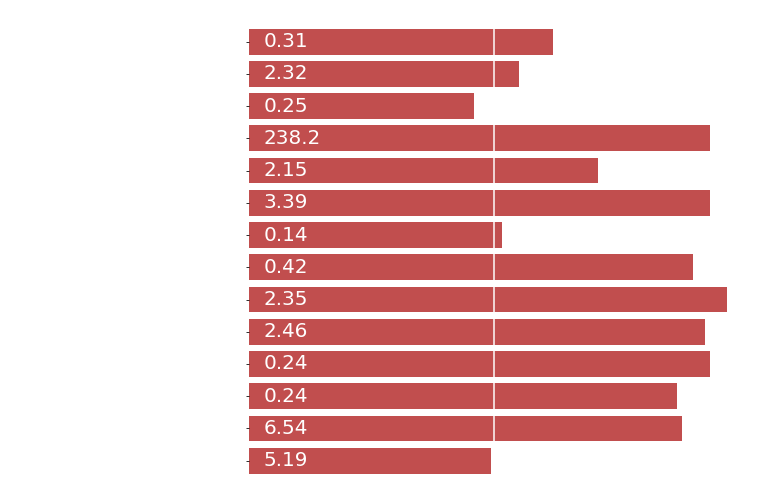

In [378]:
createBar('Willian')